Use of various statistics and visualization techniques to explore US Minimum Wage Data from 1968 to 2017.

# Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm

In [2]:
! unzip us-minimum-wage-by-state-from-1968-to-2017.zip

Archive:  us-minimum-wage-by-state-from-1968-to-2017.zip
  inflating: Minimum Wage Data.csv   


In [22]:
wages_df = pd.read_csv("minimum_wage_data.csv", engine="python")

In [23]:
wages_df.head()

,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1968,Alaska,2.10,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88


In [24]:
wages_df.describe()

,Year,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
count,2750.000000,2739.000000,2739.000000,2750.000000,2739.000000,2739.000000
mean,1992.500000,3.653761,3.533555,138.828983,6.441486,6.200252
std,14.433494,2.560308,2.539424,65.823807,3.025140,3.017818
min,1968.000000,0.000000,0.000000,34.783333,0.000000,0.000000
25%,1980.000000,1.600000,1.600000,82.408333,5.980000,5.230000
50%,1992.500000,3.350000,3.350000,142.387500,7.370000,7.170000
75%,2005.000000,5.150000,5.150000,195.291667,8.280000,8.070000
max,2017.000000,11.500000,11.500000,245.119583,15.120000,15.120000


In [25]:
wages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750 entries, 0 to 2749
Data columns (total 9 columns):
Year           2750 non-null int64
State          2750 non-null object
Table_Data     2739 non-null object
Footnote       418 non-null object
High.Value     2739 non-null float64
Low.Value      2739 non-null float64
CPI.Average    2750 non-null float64
High.2018      2739 non-null float64
Low.2018       2739 non-null float64
dtypes: float64(5), int64(1), object(3)
memory usage: 193.4+ KB


The footnotes are not important for this statistical study so I will drop this column.

In [26]:
wages_df.drop("Footnote", axis=1, inplace=True)

In [27]:
wages_df.head()

,Year,State,Table_Data,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,1968,Alabama,...,0.00000,0.00000,34.783333,0.00,0.00
1,1968,Alaska,2.10,2.10000,2.10000,34.783333,15.12,15.12
2,1968,Arizona,18.72 - 26.40/wk(b),0.66000,0.46800,34.783333,4.75,3.37
3,1968,Arkansas,1.25/day(b),0.15625,0.15625,34.783333,1.12,1.12
4,1968,California,1.65(b),1.65000,1.65000,34.783333,11.88,11.88


Some exploratory graphs

In [32]:
washington_df = wages_df[wages_df["State"] == "Washington"]

In [34]:
washington_df.head()

,Year,State,Table_Data,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
51,1968,Washington,1.60,1.6,1.6,34.783333,11.52,11.52
106,1969,Washington,1.60,1.6,1.6,36.683333,10.92,10.92
161,1970,Washington,1.60,1.6,1.6,38.825000,10.32,10.32
216,1971,Washington,1.60,1.6,1.6,40.491667,9.89,9.89
271,1972,Washington,1.60,1.6,1.6,41.816667,9.58,9.58


In [35]:
washington_df.tail()

,Year,State,Table_Data,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
2526,2013,Washington,9.19,9.19,9.19,232.957083,9.88,9.88
2581,2014,Washington,9.32,9.32,9.32,236.736167,9.86,9.86
2636,2015,Washington,9.47,9.47,9.47,237.017000,10.00,10.00
2691,2016,Washington,9.47,9.47,9.47,240.007167,9.88,9.88
2746,2017,Washington,11.00,11.00,11.00,245.119583,11.24,11.24


In [36]:
washington_df.describe()

,Year,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1992.50000,4.733600,4.727600,138.828983,8.326600,8.301800
std,14.57738,2.914717,2.919923,66.479996,1.881944,1.868613
min,1968.00000,1.600000,1.600000,34.783333,4.410000,4.410000
25%,1980.25000,2.300000,2.300000,84.537500,7.227500,7.227500
50%,1992.50000,4.250000,4.250000,142.387500,9.205000,9.055000
75%,2004.75000,7.302500,7.302500,193.689583,9.777500,9.672500
max,2017.00000,11.000000,11.000000,245.119583,11.520000,11.520000


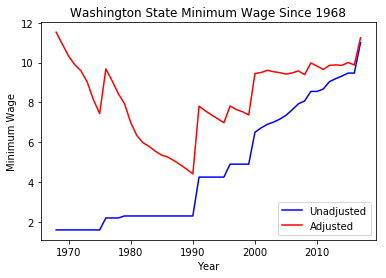

In [41]:
plt.plot(washington_df['Year'], washington_df['Low.Value'], color='blue', label="Unadjusted")
plt.plot(washington_df['Year'], washington_df['Low.2018'], color='red', label="Adjusted")
plt.title("Washington State Minimum Wage Since 1968")
plt.xlabel("Year")
plt.ylabel("Minimum Wage")
plt.legend()

Bar Graph to compare all states. In addition, any state that has a minimum wage less than the federal wage is in red.

In [ ]:
states = wages_df.loc[wages_df['Year'] == 2017, 'State']
wages_2017 = list(wages_df.loc[wages_df['Year'] == 2017, 'Low.Value'])
federal_wage = float(wages_df.loc[(wages_df['Year'] == 2017) & (wages_df['State'] == 'Federal (FLSA)'), 'Low.Value'])
colors = ['r' if wage < federal_wage else 'b' for wage in wages_2017]
plt.figure(figsize=(10,10))
plt.barh(states, wages_2017, color=colors)
plt.xlabel('Minimum Wage')
plt.ylabel('State')
plt.title('Minimum Wages in 2017')
plt.legend({'Below Federal Minimum Wage': 'Below minimum wage'})